# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [ ]:
# Import libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

##Standardizing data to avoid issues I ran into later in the process

# Drop unnamed index columns
north_df = north_df.loc[:, ~north_df.columns.str.contains("^Unnamed")]
south_df = south_df.loc[:, ~south_df.columns.str.contains("^Unnamed")]

# Strip whitespace from all string columns
for df in [north_df, south_df]:
    str_cols = df.select_dtypes(include="object").columns
    df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

# Define numeric columns that MUST be numeric
numeric_cols = [
    "Busy Minutes",
    "Not Ready Minutes",
    "Incoming Wait Time",
    "During Call Wait Time",
    "Calls",
    "Lost Call",
    "Abandoned"
]

# Convert numeric columns
for df in [north_df, south_df]:
    df[numeric_cols] = df[numeric_cols].apply(
        pd.to_numeric, errors="coerce"
    )

# Replace NaNs in wait time with 0 (no wait)
for df in [north_df, south_df]:
    df["Incoming Wait Time"] = df["Incoming Wait Time"].fillna(0)

# Fill NaNs for count-based columns with 0
count_cols = ["Calls", "Lost Call", "Abandoned", "Incoming Wait Time"]

for df in [north_df, south_df]:
    df[count_cols] = df[count_cols].fillna(0)
    df[count_cols] = df[count_cols].astype(int)


# Final validation
north_df.info()
south_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 247 non-null    object 
 1   Call Purpose           249 non-null    object 
 2   Time Block             255 non-null    object 
 3   Incoming or Outgoing   248 non-null    object 
 4   Queue                  248 non-null    object 
 5   Rep ID                 255 non-null    object 
 6   Sale                   249 non-null    object 
 7   Lost Call              256 non-null    int64  
 8   Abandoned              256 non-null    int64  
 9   Busy Minutes           250 non-null    float64
 10  Not Ready Minutes      248 non-null    float64
 11  Incoming Wait Time     256 non-null    int64  
 12  During Call Wait Time  248 non-null    float64
 13  Calls                  256 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 28.1+ KB


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [54]:
# EDA Question 1A solution below:
north_df["Rep ID"].unique().size

11

#### EDA Question 1B:  How many reps are in the South branch?  

In [55]:
# EDA Question 1B solution Below:
south_df["Rep ID"].unique().size

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [56]:
# EDA Question 2A solution Below:
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()


Busy Minutes             9.988000
Not Ready Minutes        1.915323
Incoming Wait Time       1.035156
During Call Wait Time    2.967742
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [57]:
# EDA Question 2B solution Below:
south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()


Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        1.203822
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [58]:
# EDA Question 3 solution Below:
north_calls = north_df.groupby("Time Block")["Calls"].sum()
south_calls = south_df.groupby("Time Block")["Calls"].sum()

calls_by_timeblock = north_calls + south_calls
calls_by_timeblock




Time Block
10:00 AM       99.0
11:00 AM       56.0
12:00 PM      120.0
1:00 PM        40.0
2:00 PM        65.0
3:00 PM        73.0
4:00 PM        53.0
5:00 PM        43.0
9:00 AM        11.0
Time Block      NaN
Name: Calls, dtype: float64

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
    Busy Minutes             9.987755
    Not Ready Minutes        1.914286
    Incoming Wait Time       3.048780
    During Call Wait Time    2.967347
- 2b) South Branch, (round to the nearest hundredth):
    Busy Minutes             10.054140
    Not Ready Minutes         1.910828
    Incoming Wait Time        3.000000
    During Call Wait Time     3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   =  10
> - 10:00AM  =  99
> - 11:00AM  =  56
> - 12:00PM  =  120
> - 1:00PM   =  40  
> - 2:00PM   =  65
> - 3:00PM   =  73
> - 4:00PM   =  53
> - 5:00PM   =  43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [59]:
#replacing missing "Incoming Wait Time" values with 0 for calls without wait times.
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna(0)
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna(0)
#Change from decimal to interger for "Incoming Wait Time"
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].astype(int)
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].astype(int)
north_df["Incoming Wait Time"].unique() #Added 0 and intergers
#Mean is corrected.



array([1, 2, 3, 4, 5, 0])

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

#### Record your answer below:

Answer 1:
One uncollected column to explore would be "Call Resolution", with (YES/NO) data. In this situation we could see how effective the representatives are when resolving a client's issue or giving them a solution. Along with call times, this could be a huge factor in staffing insights and overall organizational procedures.


#### Record your answer below:

Answer 2: Our "Wait Time" data does not include values for calls without a wait time (0)min, excluding them from being counted when we calculate our mean "Wait Time". Fixing this code would allow us to better estimate how long the average guest waits.


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [60]:
# Cleaning Question 2 solution below:
# Issue involves space before second single quote
north_df["Sale"] = north_df["Sale"].str.strip()
north_df["Sale"].unique() 

array(['NO', 'YES', nan, 'Sale'], dtype=object)

##### Record your answer by below:
> Your Answer: To solve this issue I used string.strip to elimate the extra spaces causing the issue.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [61]:
# Cleaning Question 3 solution below:

north_df.drop_duplicates(inplace=True)
south_df.drop_duplicates(inplace=True)


##### Record your answer below:
> Your Answer: There are duplicate rows present in both dataframes. I cleaned them with drop duplicates function.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [62]:
#Dropping Unnamed Columns
north_df = north_df.drop(columns=[col for col in north_df.columns if "Unnamed" in col])
south_df = south_df.drop(columns=[col for col in south_df.columns if "Unnamed" in col])

south_df.head()


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1,3,1


##### Record your answer below:
Each dataset has a column indicating the call number (Unnamed:), this matches with our index already, making it redundant. I chose to remove these columns using .drop(columns).

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [63]:
# Create dataframe for the entire company named df
combined_df = pd.concat([north_df, south_df], ignore_index=True)
combined_df.sample(50)


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
511,South,Product Support,2:00 PM,Outgoing,D,Helga,NO,0,0,9.0,3.0,0,2.0,1
486,South,Product Support,12:00 PM,Outgoing,D,Karl,NO,0,0,11.0,1.0,0,3.0,1
26,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,10.0,1.0,2,4.0,1
409,South,Sales Support,10:00 AM,Outgoing,D,Josh,NO,0,0,11.0,1.0,0,2.0,1
490,South,Product Support,12:00 PM,Outgoing,D,Karl,NO,0,0,12.0,3.0,0,4.0,1
387,South,Product Support,5:00 PM,Outgoing,D,Randy,NO,1,0,9.0,3.0,0,2.0,1
502,South,Product Support,1:00 PM,Outgoing,D,Karl,YES,0,0,11.0,1.0,0,2.0,1
64,North,Sales Support,10:00 AM,Incoming,B,Brent,NO,0,0,8.0,1.0,5,4.0,1
167,North,Product Support,12:00 PM,Outgoing,A,Amanda,NO,0,0,10.0,3.0,0,3.0,1
434,South,Sales Support,12:00 PM,Outgoing,D,Kate,NO,0,0,11.0,1.0,0,4.0,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [64]:
# Manipulation Question 1 solution below:
combined_df = combined_df[combined_df["Branch"] != "Branch"]
combined_df["Calls"] = pd.to_numeric(combined_df["Calls"], errors="coerce")


top_rep_per_branch = (combined_df
        .groupby(["Branch", "Rep ID"])["Calls"].sum()
        .reset_index()
        .sort_values(["Branch", "Calls"],ascending=[True, False])
        .groupby("Branch").head(1))

top_rep_per_branch


,Branch,Rep ID,Calls
2,North,Brent,37
10,South,Eric,35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [65]:
# Manipulation Question 2 solution below:
abandonment_rate_all =combined_df["Abandoned"].mean()
# Rate = 0.019677
# Results in optimal KPI of less than 2% abandonded calls.
Branch_abandonment_rate = (combined_df
        .groupby(["Branch"])["Abandoned"].mean())
Branch_abandonment_rate
# Branch
# North    0.028571
# South    0.012739
           # Abandoned
#North Branch is within range of 2% to 5% abandoned calls.
#South Branch exceeding KPI range of 2% to 5% abandoned calls.

Branch
North    0.028807
South    0.012862
Name: Abandoned, dtype: float64

##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 0.028571
- South Branch = 0.012739
- Company Wide = 0.019677
- Do any of these fall out of the optimal range of 2-5%? No, All results show KPI is well within the optimal zone, and in some cases outperforming expectations. 

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [66]:
# Manipulation Question 3 solution below:
combined_df["Within_2_Seconds"] = combined_df["Incoming Wait Time"] <= 2
service_level_by_branch = (
    combined_df
    .groupby("Branch")["Within_2_Seconds"]
    .mean()
    * 100)

service_level_by_branch

company_service_level = combined_df["Within_2_Seconds"].mean() * 100
company_service_level



np.float64(77.26465364120781)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.000000
- South Branch = 75.159236
- Company Wide = 77.280857

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [67]:
# Manipulation Question 4 solution below:
asa_by_branch = (
    combined_df
    .groupby("Branch")["Incoming Wait Time"]
    .mean())
asa_by_branch

company_asa = combined_df["Incoming Wait Time"].mean()
company_asa


np.float64(1.1278863232682061)

##### Record your answer by below:
Average speed of answer (ASA) (rounded to nearest hundredth):
- North Branch in seconds = (ASA) is 1.02 seconds
- South Branch in seconds = (ASA) is 1.20 seconds
- Company Wide in seconds = (ASA) is 1.12 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

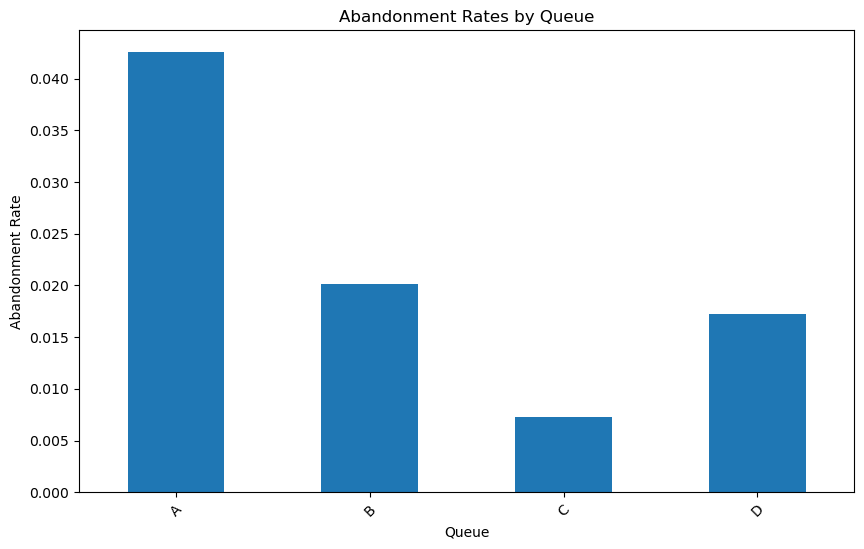

In [73]:
# Calculate total abandoned calls and total calls per queue
queue_totals = combined_df.groupby("Queue")[["Abandoned", "Calls"]].sum()

# Calculate abandonment rate
abandonment_rates = queue_totals["Abandoned"] / queue_totals["Calls"]

abandonment_rates
# Queue
# A    0.041667
# B    0.020134
# C    0.007246
# D    0.017045

# Plot the abandonment rates
plt.figure(figsize=(10, 6))
abandonment_rates.plot(kind="bar")
plt.title("Abandonment Rates by Queue")
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate")
plt.xticks(rotation=45)
plt.show()

##### Record your answer below:

> Chart style you chose and why: 

> Visaulization 1 is a bar chart. It allows us to easily compare each queue's abandonment rate both visually and by the rate itself. The highest rate of abandonment is 4%(A), and the lowest is just below 1%(C). Each queue has managed to keep abondonment below 5% with 3 out 4 queues at 2% or below.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

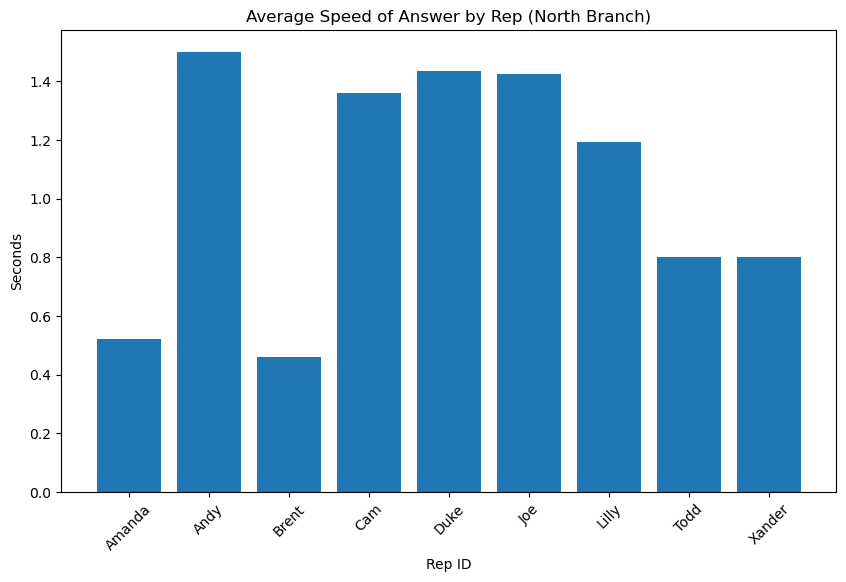

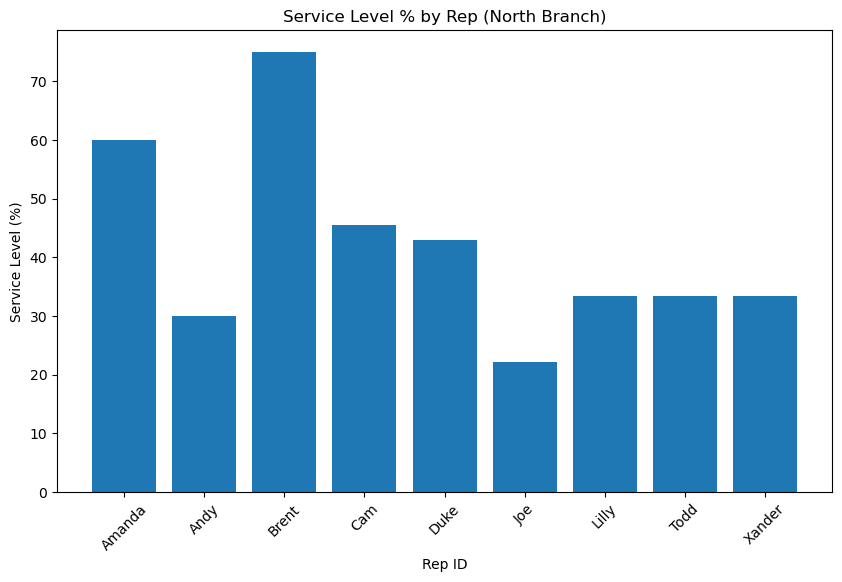

In [70]:
north_plt = (
    north_df
    .groupby("Rep ID")["Incoming Wait Time"]
    .mean()
    .reset_index()
    .rename(columns={"Incoming Wait Time": "ASA"})
)
# Incoming calls only
incoming_calls = north_df[north_df["Incoming or Outgoing"] == "Incoming"]

# Incoming calls answered within 2 seconds
quick_calls = incoming_calls[incoming_calls["Incoming Wait Time"] <= 2]

# Counts per rep
quick_stats = quick_calls.groupby("Rep ID")["Calls"].sum().reset_index()
total_stats = incoming_calls.groupby("Rep ID")["Calls"].sum().reset_index()

# Merge and calculate %
service_level = pd.merge(quick_stats, total_stats, on="Rep ID", suffixes=("_quick", "_total"))
service_level["Service Level %"] = (
    service_level["Calls_quick"] / service_level["Calls_total"] * 100
)

service_level = service_level[["Rep ID", "Service Level %"]]

north_rep_metrics = pd.merge(north_plt, service_level, on="Rep ID")
north_rep_metrics

plt.figure(figsize=(10,6))
plt.bar(north_rep_metrics["Rep ID"], north_rep_metrics["ASA"])
plt.title("Average Speed of Answer by Rep (North Branch)")
plt.xlabel("Rep ID")
plt.ylabel("Seconds")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(north_rep_metrics["Rep ID"], north_rep_metrics["Service Level %"])
plt.title("Service Level % by Rep (North Branch)")
plt.xlabel("Rep ID")
plt.ylabel("Service Level (%)")
plt.xticks(rotation=45)
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

> I chose barcharts for both visuals as they allow comparison between all 11 representatives while giving a clear idea of service level(%) and average speed of answer. In our first chart it is important to emphasize that a smaller bar (lower answer rate) is more desireable as this indicates the quickness of the call answer. This provides context for chart two which is almost a flipped version indicating the level of service provided by each rep.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

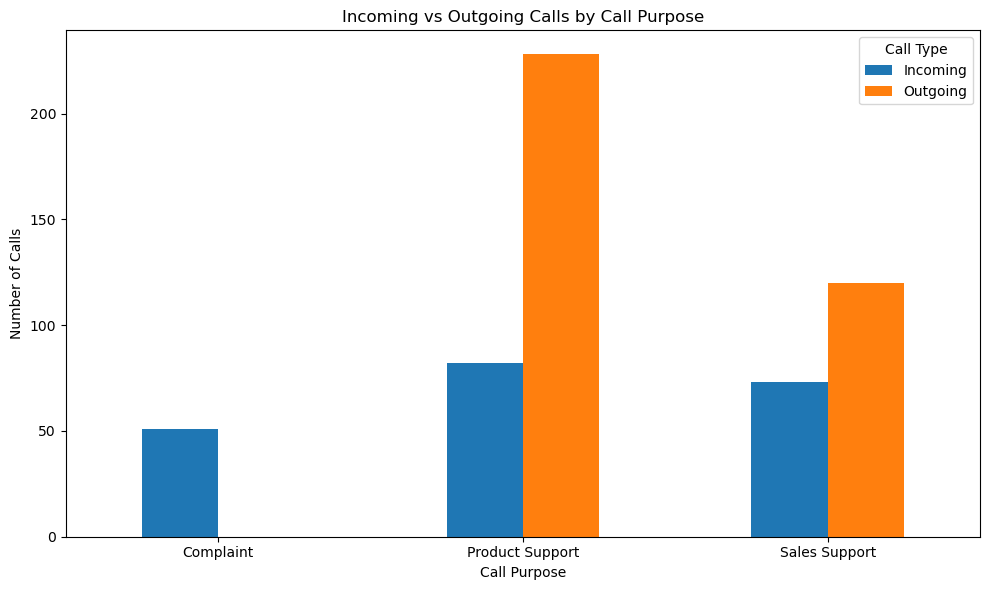

In [75]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = (
    combined_df
    .groupby(["Call Purpose", "Incoming or Outgoing"])["Calls"]
    .sum()
    .unstack()
)

purpose_counts = purpose_counts.fillna(0)

# Plot grouped bar chart
purpose_counts.plot(kind="bar", figsize=(10,6))
plt.title("Incoming vs Outgoing Calls by Call Purpose")
plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.xticks(rotation=0)
plt.legend(title="Call Type")
plt.tight_layout()
plt.show()




##### Record your answer below:

> Chart style you chose and why: 

> I chose a grouped bar chart to compare the multi-variable data. Number of Calls and Incoming/Outgoing categories begin revealing patterns in this visual format. One can see the Call Center reps are often conducting outgoing calls to help customers and grow sales. They are not addressing customer complaints unless the customer calls them directly. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The north branch has all around higher performance than the south branch. Although the lead is small, it shows how some representatives boost the overall stats for their respective call center. North Branch operates at higher service level, average speed of answer, and meets optimal abondonment KPI range. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Based on performance, representatives at the south call center could use additional help with answering phones in the form of a new representative. They perform lower in both service level and average speed of answer. Reducing wait times and improving service levels is an ideal outcome.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Additional columns like call resolution status, or customer satisfaction would give insight into the affectiveness of each representative.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [72]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: